# Tarea 6: Ecuaciones algebráicas

Este problema es una mezcla entre el tema de Imágenes y el tema de solución de ecuaciones algebráicas y mapeos. 

[9] Considera el mapeo cuadrático $z_n = z_{n-1}^2 + c$, donde $z_n$ y $c$ son números complejos. 

(i) Demuestra que el mapeo no converge si $|z_n|>2$ para algún valor de $n$.  

(ii) Haz una función que dado $c$, $z_0$ y $n$ arroje $true$ y $|z_n|$ si ningún valor de $|z_i|$ con $i\leq n$ es mayor que 2 y false y $n-i+1$ si $|z_i|$ es el primer valor mayor que 2. Si arroja false significa que la sucesión no converge. Si arroja true significa que "posiblemente" converje. $n-i+1$ es a cuantos pasos quedó de "considerarse que sí convergiera". Es una medida qué tan lento se "sale de la convergencia". $|z_n|$ en el caso de que se considere que converja, es aproximadamente a qué valor converge. 

(iii) Fractal de Mandelbrot. Los números complejos se pueden expresar en el plano (plano complejo), donde la parte imaginaria es el eje $y$ y la parte real es el  eje $x$. Considera $z_0 = 0$. Queremos saber qué valores de $c$ forman una suscesión que converge. Utilizando la paquetería Images (y el truco para convertir coordenadas en pixeles), haz una función que dibuje en negro todos los valores de $c$ que "convergen" (para n = 100, por ejemplo) y en una escala de colores basada en $n-i+1$, que sea más oscura entre más cerca esté de $0$ que dibuje los puntos que no convergen. 

(iv) Fractal de Julia. Elige algún valor de $c$ que corresponda a las zonas "negras" del fractal de Mandelbrot. Entre más cercano a la frontera (sin estar sobre la frontera) mejor. El problema es casi idéntico al anterior, excepto que ahora lo que graficarás son los valores de $z_0$ (en vez de los valores de $c$) con los que la sucesión converge.  Intenta graficar 3 versiones, (i) los que convergen sean negros y los que no que tengan un color dependiendo de $n-i+1$. (ii) Que los que no convergen sean negros y los que convergen tengan un color dependiendo de $|z_n|$. (iii) Que todos todos tengan un color, dependiendo de $n-i+1$ en el caso de los que no convergen y de $|z_n|$ en el caso de los que sí convergen. 

**Nota:** Te recomiendo jugar con tu programa y ver cómo se ve con diferentes valores de $n$ y con diferentes valores de $c$. Por supuesto eso no lo podemos calificar, pero seguramente vas a disfrutarlo y te va a interesar leer sobre el fractal de Julia (y su interesante historia) y el de Mandelbrot. 

**Nota2:** Como sugerencia de colores, normaliza $n-i+1$ de tal forma que pueda tener valores entre 0 y 1, lo mismo para $|z_n|$ (es decir, divide entre $n$ y entre 2 respectivamente). Con la versión normalizada puedes hacer una ecuación lineal para el rojo, una cuadrática para el verde y una cúbica para el azul (las 3 funciones que vayan de 0 a 1 si su dominio es el intervalo [0,1]). 

**Nota3:** Una imagen de $1600\times 1600$ es bastante razonable (no sobre pases los 20Mpx). Y recuerda que como $z_1 = c$, $|c|<2$ (un $|c|>2$ sabemos que generará una suscesión que no converge), por lo tanto el máximo en los límites que vale la pena dibujar es el $-2<x<2$ y $-2<y<2$ (lo que llamé cajax y cajay en el video tendrían que ser $[-2,2]$ y $[-2,2]$). Para los colores, ver Nota2 del siguiente ejercicio. 

(i) *Demostración:*

Sea $\epsilon>0$ tq. $|z_{n}|>2+\epsilon$. (1), usando el mapeo cuadrático con la "otra" desigualdad triangular

$\rightarrow |z_{n}|=|z^{2}_{n-1}+c| \geq |z_{n-1}|^{2} - |c|$

Por otro lado, sup. que  $|z_{n-1}|>|c|$, la anterior desigualdad implica que

$ |z_{n-1}|^{2} - |c| \geq |z_{n-1}|^{2} - |z_{n-1}| = (|z_{n-1}|-1) |z_{n-1}|$

y usando (1)

$|z_{n}|-1>1+\epsilon \rightarrow |z_{n}| \geq |z_{n-1}|^{2} - |c| >(1+\epsilon) |z_{n-1}|$

Así, inductivamente $|z_{n}|>(1+\epsilon)^{n} |z_{0}|$. Y como $(1+\epsilon)^{n} \rightarrow \infty$  cuando $n \rightarrow \infty$, entonces

$|z_{n}| \rightarrow \infty$ cuando $n \rightarrow \infty, \forall \epsilon>0$ $_{\blacksquare}$

In [1]:
function convergencia(c, z_0, n) #(ii)
    i = 0 #será nuestro contador de iteración
    z_i = z_0 #la primera iteración
    while abs(z_i)<2
        if i == n #aquí le decimos que pare en base al número de iteración n
            return true, abs(z_i)
        end
        z_i = z_i^2 + c #acá usamos la expresión del mapeo para actualizar z_i
        i += 1 
    end
    false, n-i+1 
end

convergencia (generic function with 1 method)

In [2]:
convergencia(1, 0, 1) #ejemplos sencillos
convergencia(2, 0, 1)
convergencia(0, 2, 0)
convergencia(0.275, 0.5, 11) #ejemplo más realista
convergencia(0+0.5im, 0.5, 2)
abs(-0.1875+0.75im) #comprobación del resultado de arriba
convergencia(0.5, 0.5, 5)

(false, 2)

In [2]:
using Images, ImageView, ImageIO #Ahora, para (iii) cargamos las librerías necesarias

In [4]:
function dibuja_punto_en_imagen(x, y, cajax, cajay, h, w, Imagen) #usamos la función del profe para los puntos que convergen
    w, h = size(Imagen)
    pixel_x = ceil(Int, w*(x-cajax[1])/(cajax[2]-cajax[1]))
    pixel_y = ceil(Int, h*(y-cajay[1])/(cajay[2]-cajay[1]))
    Imagen[pixel_y, pixel_x] = RGB(0, 0, 0) #pinta en negro
end

dibuja_punto_en_imagen (generic function with 1 method)

In [5]:
n_iteracion = 50 #acá podemos variar el número de iteraciones (lo deje en 50 porque se aprecian más las regiones de convergencia)
#aplicamos lo de la Nota2 para los puntos que no convergen
function dibuja_punto_en_imagenv2(x, y, cajax, cajay, h, w, Imagen) #definimos una nueva versión de la función anterior
    w, h = size(Imagen)
    pixel_x = ceil(Int, w*(x-cajax[1])/(cajax[2]-cajax[1]))
    pixel_y = ceil(Int, h*(y-cajay[1])/(cajay[2]-cajay[1]))
    u = (convergencia(x+(y)im, 0, n_iteracion)[2])/n_iteracion #este es el valor de a cuantos pasos quedo de "converger"(normalizado)
    Imagen[pixel_y, pixel_x] = RGB(1-u, 1-u^2, 1-u^3) #usamos en las expresiones mencionadas
end

dibuja_punto_en_imagenv2 (generic function with 1 method)

In [6]:
w, h = 1600, 1600
Imagen = [RGB(1, 1, 1) for i in 1:w, j in 1:h] #creamos el lienzo
paso = 4/1600
function crea_el_fractal_de_Mandelbrot(n_iteracion)
    for a in -2:paso:2
        for b in -2:paso:2
            if convergencia(a+(b)im, 0, n_iteracion)[1] == true #acá pintamos los puntos que "convergen"
                try
                    dibuja_punto_en_imagen(a, b, [-2-paso, 2+paso], [-2-paso, 2+paso], h, w, Imagen) #la caja la definí así, porque del otro modo me arroja franjas erróneas
                catch  
                end #hasta acá termina el de convergencia
            else
                try
                    dibuja_punto_en_imagenv2(a, b, [-2-paso, 2+paso], [-2-paso, 2+paso], h, w, Imagen) #acá pintamos los puntos que no convergen
                catch  
                end
            end
        end
    end          
    Imagen
end

crea_el_fractal_de_Mandelbrot (generic function with 1 method)

In [48]:
using Plots, LaTeXStrings

In [57]:
for n in 1:50
    heatmap(-2:2, -2:2, crea_el_fractal_de_Mandelbrot(5), xlabel=L"Re(z)", ylabel=L"Im(z)", title = "n = 5") #con heatmap 
    save("$n.png", graf)
end

LoadError: MethodError: no method matching +(::Int64, ::RGB{N0f8})
Math on colors is deliberately undefined in ColorTypes, but see the ColorVectorSpace package.
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at C:\Users\Angel\AppData\Local\Programs\Julia-1.7.2\share\julia\base\operators.jl:655
[0m  +(::T, [91m::T[39m) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at C:\Users\Angel\AppData\Local\Programs\Julia-1.7.2\share\julia\base\int.jl:87
[0m  +(::T2, [91m::SIMD.Vec{N, T}[39m) where {N, T2<:Union{Float32, Float64, Int16, Int32, Int64, Int8, UInt16, UInt32, UInt64, UInt8}, T<:Union{Float32, Float64}} at C:\Users\Angel\.julia\packages\SIMD\myoU9\src\simdvec.jl:395
[0m  ...

┌ Info: Saved animation to 
│   fn = C:\Users\Angel\Documents\Ángel\Tareas\Universidad\10mo semstre\FC\tmp.gif
└ @ Plots C:\Users\Angel\.julia\packages\Plots\hxZ0l\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Angel\\Documents\\Ángel\\Tareas\\Universidad\\10mo semstre\\FC\\tmp.gif")
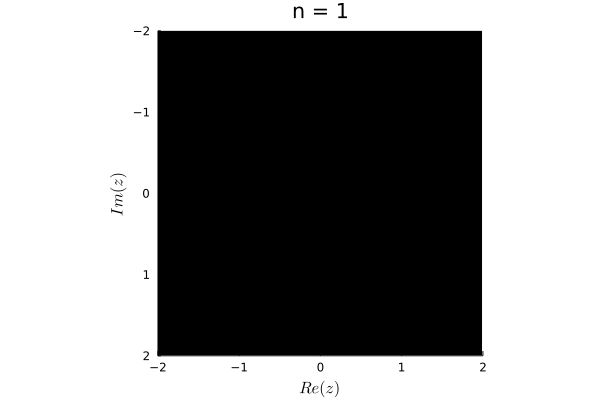

In [31]:
gr()
@gif for n in 1:10
    heatmap(-2:2, -2:2, crea_el_fractal_de_Mandelbrot(n), xlabel=L"Re(z)", ylabel=L"Im(z)", title = "n = $n")
end

In [14]:
mandelbrot_azul = @animate for n in 1:50
    heatmap(-2:2, -2:2, crea_el_fractal_de_Mandelbrot(n), xlabel=L"Re(z)", ylabel=L"Im(z)", title = "n = $n")
end

Animation("C:\\Users\\Angel\\AppData\\Local\\Temp\\jl_O7s6YB", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000041.png", "000042.png", "000043.png", "000044.png", "000045.png", "000046.png", "000047.png", "000048.png", "000049.png", "000050.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\Angel\Documents\Ángel\Tareas\Universidad\10mo semstre\FC\fractalMandelbrotAzulfps10.gif
└ @ Plots C:\Users\Angel\.julia\packages\Plots\hxZ0l\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Angel\\Documents\\Ángel\\Tareas\\Universidad\\10mo semstre\\FC\\fractalMandelbrotAzulfps10.gif")
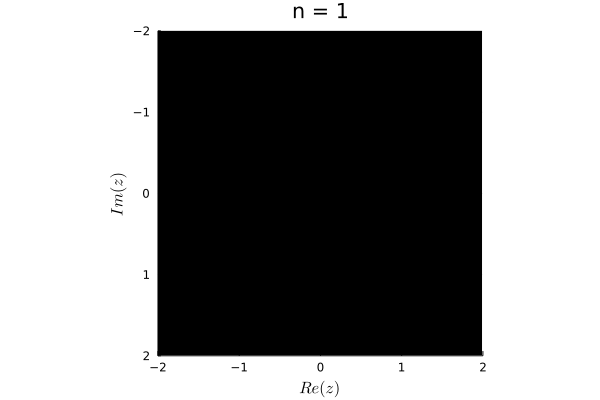

In [15]:
gif(mandelbrot_azul, "fractalMandelbrotAzulfps10.gif", fps = 10)

┌ Info: Saved animation to 
│   fn = C:\Users\Angel\Documents\Ángel\Tareas\Universidad\10mo semstre\FC\tmp.gif
└ @ Plots C:\Users\Angel\.julia\packages\Plots\hxZ0l\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Angel\\Documents\\Ángel\\Tareas\\Universidad\\10mo semstre\\FC\\tmp.gif")
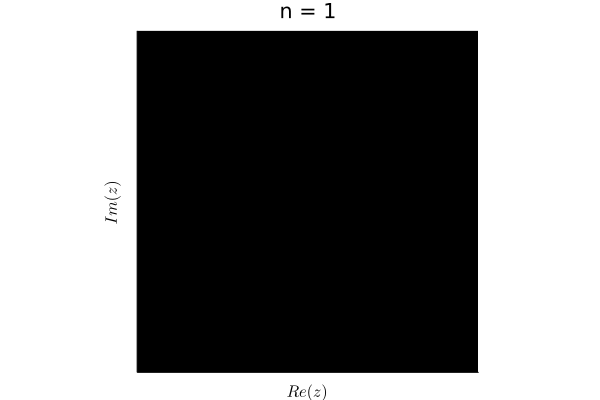

In [58]:
gr()
@gif for n in 1:5 #con plot
    plot(crea_el_fractal_de_Mandelbrot(n), xlabel=L"Re(z)", ylabel=L"Im(z)", xticks=false, yticks=false, title = "n = $n")
end

In [97]:
animacion = @animate for n in 1:50
    plot(crea_el_fractal_de_Mandelbrot(n), xlabel=L"Re(z)", ylabel=L"Im(z)", xticks=false, yticks=false, title = "n = $n")
end

Animation("C:\\Users\\Angel\\AppData\\Local\\Temp\\jl_XWYA4z", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000041.png", "000042.png", "000043.png", "000044.png", "000045.png", "000046.png", "000047.png", "000048.png", "000049.png", "000050.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\Angel\Documents\Ángel\Tareas\Universidad\10mo semstre\FC\fractalMandelbrotfps10.gif
└ @ Plots C:\Users\Angel\.julia\packages\Plots\hxZ0l\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Angel\\Documents\\Ángel\\Tareas\\Universidad\\10mo semstre\\FC\\fractalMandelbrotfps10.gif")
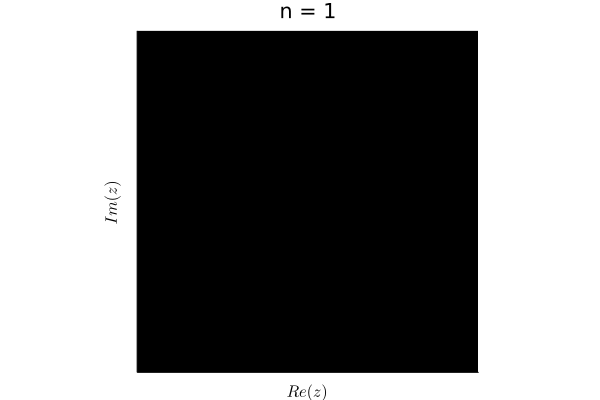

In [98]:
gif(animacion, "fractalMandelbrotfps10.gif", fps = 10)

┌ Info: Saved animation to 
│   fn = C:\Users\Angel\Documents\Ángel\Tareas\Universidad\10mo semstre\FC\fractalMandelbrotfps5.gif
└ @ Plots C:\Users\Angel\.julia\packages\Plots\hxZ0l\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Angel\\Documents\\Ángel\\Tareas\\Universidad\\10mo semstre\\FC\\fractalMandelbrotfps5.gif")
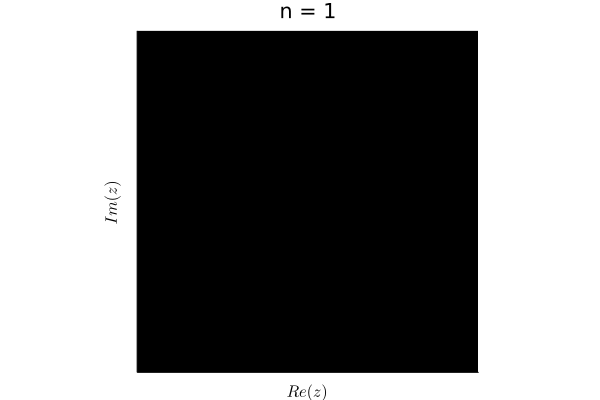

In [99]:
gif(animacion, "fractalMandelbrotfps5.gif", fps = 5)

In [6]:
imshow(Imagen)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(name="", parent, w…
  "roi"         => Dict{String, Any}("redraw"=>50: "map(clim-mapped image, inpu…
  "annotations" => 3: "input-2" = Dict{UInt64, Any}() Dict{UInt64, Any} 
  "clim"        => 2: "CLim" = CLim{RGB{Float64}}(RGB{Float64}(0.0,0.0,0.0), RG…

In [84]:
save("FractaldeMandelbrot.png", Imagen)

In [40]:
using LaTeXStrings

Para la parte (iv) seleccione el pixel [561, 678] (recordando que en el visulizador de ImageView los píxeles se escriben [y, x]) el cual aplicando una regla de 3 encontramos que corresponde al valor $c = -0.5975-0.305im$ en el plano complejo.

In [50]:
function dibuja_punto_en_imagenv3(x, y, cajax, cajay, h, w, Imagen) #definimos una nueva versión de la función anterior
    w, h = size(Imagen)
    pixel_x = ceil(Int, w*(x-cajax[1])/(cajax[2]-cajax[1]))
    pixel_y = ceil(Int, h*(y-cajay[1])/(cajay[2]-cajay[1]))
    u = (convergencia(-0.5975-0.305im, x+(y)im, n_iteracion)[2])/n_iteracion #este es el valor de a cuantos pasos quedo de "converger"(normalizado)
    Imagen[pixel_y, pixel_x] = RGB(1-u, 1-u^2, 1-u^3) #usamos en las expresiones mencionadas
end

dibuja_punto_en_imagenv3 (generic function with 1 method)

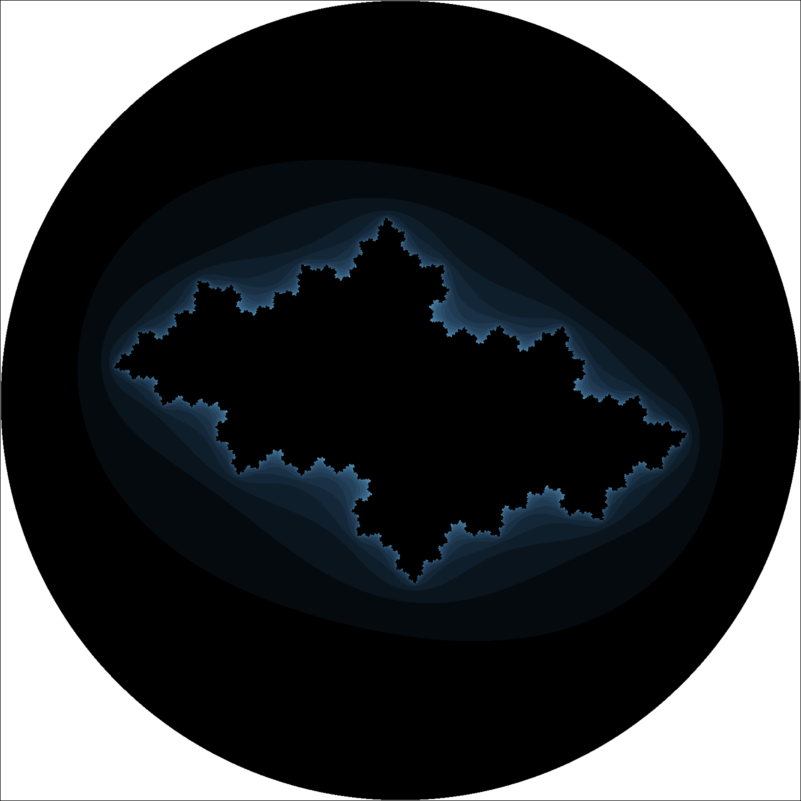

In [78]:
#versión 1 (i)
Imagen1 = [RGB(1, 1, 1) for i in 1:w, j in 1:h] #creamos el lienzo
for a in -2:paso:2
    for b in -2:paso:2
        if convergencia(-0.5975-0.305im, a+(b)im, n_iteracion)[1] == true #acá pintamos los puntos que "convergen"
            try
                dibuja_punto_en_imagen(a, b, [-2-paso, 2+paso], [-2-paso, 2+paso], h, w, Imagen1) #los pintamos de negro
            catch  
            end #hasta acá termina el de convergencia
        else
            try
                dibuja_punto_en_imagenv3(a, b, [-2-paso, 2+paso], [-2-paso, 2+paso], h, w, Imagen1) #acá pintamos los puntos que no convergen
            catch  
            end
        end
    end
end          
Imagen1 #por alguna razón deja en blanco los píxeles fuera de una circunferencia

In [60]:
imshow(Imagen1)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(name="", parent, w…
  "roi"         => Dict{String, Any}("redraw"=>500: "map(clim-mapped image, inp…
  "annotations" => 453: "input-110" = Dict{UInt64, Any}() Dict{UInt64, Any} 
  "clim"        => 452: "CLim" = CLim{RGB{Float64}}(RGB{Float64}(0.0,0.0,0.0), …

In [53]:
#convergencia(-0.5975-0.305im, -1.595+1.62im, n_iteracion) #ejemplo de los puntos que pone en blanco

(false, 51)

In [71]:
function dibuja_punto_en_imagenv4(x, y, cajax, cajay, h, w, Imagen) #definimos una nueva versión de la función anterior
    w, h = size(Imagen)
    pixel_x = ceil(Int, w*(x-cajax[1])/(cajax[2]-cajax[1]))
    pixel_y = ceil(Int, h*(y-cajay[1])/(cajay[2]-cajay[1]))
    u = convergencia(-0.5975-0.305im, x+(y)im, n_iteracion)[2] #este es el módulo |z_i|, que oscila entre 0 y 2
    u_normalizada = u/2
    Imagen[pixel_y, pixel_x] = RGB(1-u_normalizada, 1-u_normalizada^2, 1-u_normalizada^3) 
end

dibuja_punto_en_imagenv4 (generic function with 1 method)

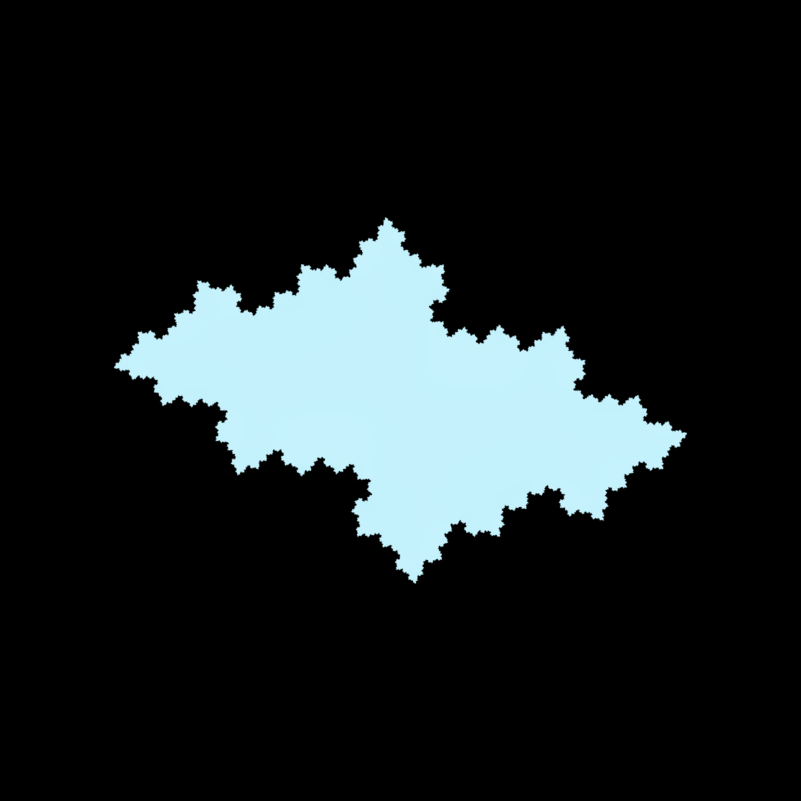

In [79]:
Imagen2 = [RGB(1, 1, 1) for i in 1:w, j in 1:h] #versión 2 (ii)
for a in -2:paso:2
    for b in -2:paso:2
        if convergencia(-0.5975-0.305im, a+(b)im, n_iteracion)[1] == true #acá pintamos los puntos que "convergen"
            try
                dibuja_punto_en_imagenv4(a, b, [-2-paso, 2+paso], [-2-paso, 2+paso], h, w, Imagen2) #los pintamos de color
            catch  
            end 
        else
            try
                dibuja_punto_en_imagen(a, b, [-2-paso, 2+paso], [-2-paso, 2+paso], h, w, Imagen2) #al resto de de negro
            catch  
            end
        end
    end
end          
Imagen2 

In [80]:
imshow(Imagen2)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(name="", parent, w…
  "roi"         => Dict{String, Any}("redraw"=>700: "map(clim-mapped image, inp…
  "annotations" => 653: "input-158" = Dict{UInt64, Any}() Dict{UInt64, Any} 
  "clim"        => 652: "CLim" = CLim{RGB{Float64}}(RGB{Float64}(0.0,0.0,0.0), …

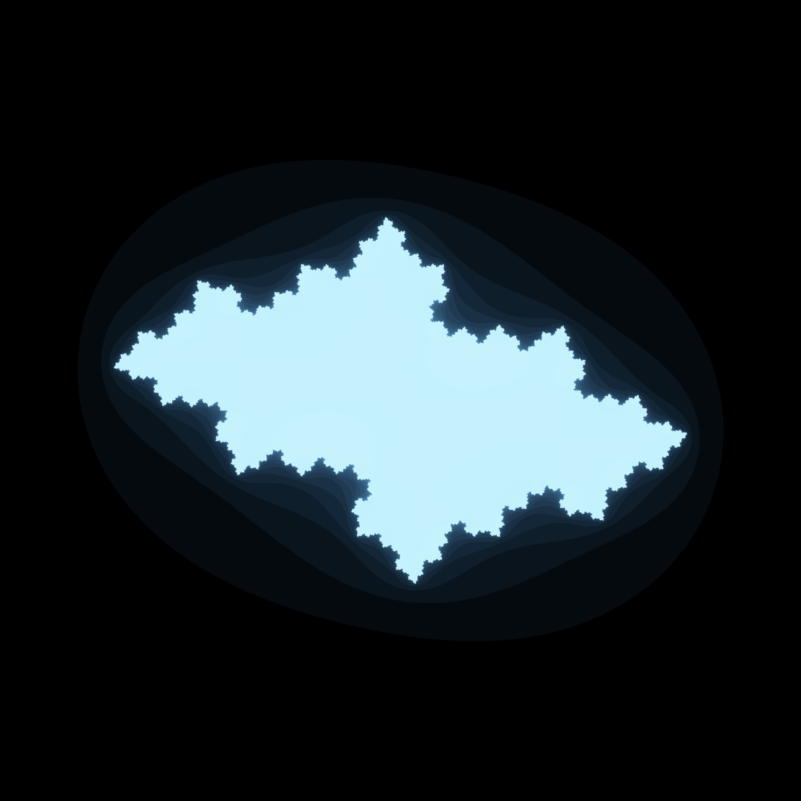

In [81]:
Imagen3 = Imagen2 #versión 3(iii), lo definí sobre la Imagen2 porque así evitamos el error de la circunferencia
for a in -2:paso:2 
    for b in -2:paso:2
        if convergencia(-0.5975-0.305im, a+(b)im, n_iteracion)[1] == true #acá pintamos los puntos que "convergen"
            try#pesé a que la Imagen2 ya tiene los puntos que convergen, los volví a pintar para que no fuera un "engaño"
                dibuja_punto_en_imagenv4(a, b, [-2-paso, 2+paso], [-2-paso, 2+paso], h, w, Imagen3) 
            catch  
            end 
        else #acá al resto
            try
                dibuja_punto_en_imagenv3(a, b, [-2-paso, 2+paso], [-2-paso, 2+paso], h, w, Imagen3) 
            catch  
            end
        end
    end
end          
Imagen3 #para esto solo usamos 2 de las versiones definidas previamente

In [82]:
imshow(Imagen3)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(name="", parent, w…
  "roi"         => Dict{String, Any}("redraw"=>750: "map(clim-mapped image, inp…
  "annotations" => 703: "input-170" = Dict{UInt64, Any}() Dict{UInt64, Any} 
  "clim"        => 702: "CLim" = CLim{RGB{Float64}}(RGB{Float64}(0.0,0.0,0.0), …

In [83]:
save("FractaldeJulia.png", Imagen3)